Importing the Libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact
import sklearn

In [3]:
#reading the datset
data = pd.read_csv("plant data.csv")

In [4]:
#checking the data set
data.shape

(2200, 8)

In [5]:
#checking the head of the data set
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
#checking for the null values in the data set
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
#checking the crops count
data["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
#playing to see some avarage value stats

print("Average ratio of the Nitrogen in the soil: {0:.2f}".format(data["N"].mean()))
print("Average ratio of the Phosphorus in the soil: {0:.2f}".format(data["P"].mean()))
print("Average ratio of the Potassium in the soil: {0:.2f}".format(data["K"].mean()))
print("Average ratio of the Temperature in Cel: {0:.2f}".format(data["temperature"].mean()))
print("Average ratio of the Humidity % in the soil: {0:.2f}".format(data["humidity"].mean()))
print("Average ratio of the Ph level in the soil: {0:.2f}".format(data["ph"].mean()))
print("Average ratio of the Rainfall in mm: {0:.2f}".format(data["rainfall"].mean()))

Average ratio of the Nitrogen in the soil: 50.55
Average ratio of the Phosphorus in the soil: 53.36
Average ratio of the Potassium in the soil: 48.15
Average ratio of the Temperature in Cel: 25.62
Average ratio of the Humidity % in the soil: 71.48
Average ratio of the Ph level in the soil: 6.47
Average ratio of the Rainfall in mm: 103.46


In [9]:
# checking the stat summary for each crop using interact

@interact
def crop_summary(crops = list(data["label"].value_counts().index)):
    x =data[data["label"] == crops]
    print("\n.......................................................")
    print ("Stats for Nitrogen")
    print("The Minimum Nitrogen required: ", x['N'].min())
    print("The Average Nitrogen required: ", x['N'].mean())
    print("The Maximum Nitrogen required: ", x['N'].max())
    print("\n.......................................................")
    print ("Stats for Phosphorus")
    print("The Minimum Phosphorus required: ", x['P'].min())
    print("The Average Phosphorus required: ", x['P'].mean())
    print("The Maximum Phosphorus required: ", x['P'].max())
    print("\n.......................................................")
    print ("Stats for Potassium")
    print("The Minimum Potassium required: ", x['K'].min())
    print("The Average Potassium required: ", x['K'].mean())
    print("The Maximum Potassium required: ", x['K'].max())
    print("\n.......................................................")
    print ("Stats for Temperature")
    print("The Minimum Temperature required: ", x['temperature'].min())
    print("The Average Temperature required: ", x['temperature'].mean())
    print("The Maximum Temperature required: ", x['temperature'].max())
    print("\n.......................................................")
    print ("Stats for Humidity % ")
    print("The Minimum Humidity %  required: ", x['humidity'].min())
    print("The Average Humidity %  required: ", x['humidity'].mean())
    print("The Maximum Humidity %  required: ", x['humidity'].max())
    print("\n.......................................................")
    print ("Stats for Ph level")
    print("The Minimum Ph level required: ", x['ph'].min())
    print("The Average Ph level required: ", x['ph'].mean())
    print("The Maximum Ph level required: ", x['ph'].max())
    print("\n.......................................................")
    print ("Stats for Rainfall")
    print("The Minimum Rainfall required: ", x['rainfall'].min())
    print("The Average Rainfall required: ", x['rainfall'].mean())
    print("The Maximum Rainfall required: ", x['rainfall'].max())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [10]:
#comparing the crop on above and below averege level

@interact
def compare(conditions = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]):
    print("The average value for ", conditions,"is {0:2f}".format(data[conditions].mean()))
    print("\n.......................................................\n")

    print("Crops which require greater than average ",conditions,"\n")
    print(data[data[conditions] > data[conditions].mean()]["label"].unique())
    print("\n.......................................................\n")

    print("Crops which require lesser than average ",conditions,"\n")
    print(data[data[conditions] <= data[conditions].mean()]["label"].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

# Distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

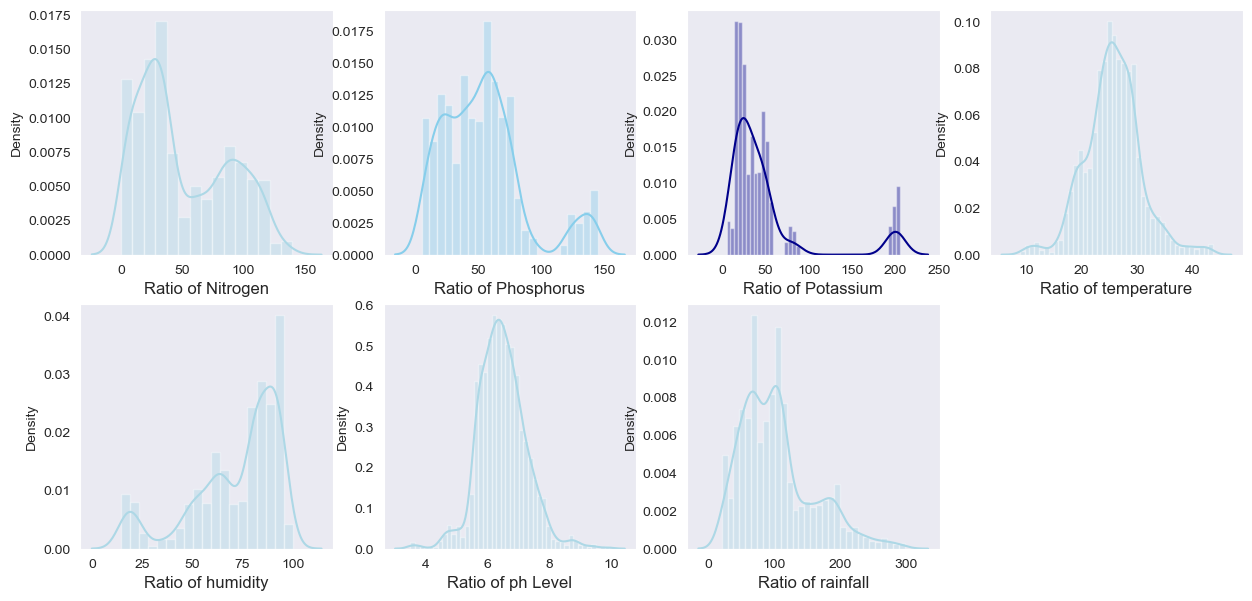

In [11]:
#checking the distribution of Agricultural Conditions

plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.distplot(data['N'],color="lightblue")
plt.xlabel("Ratio of Nitrogen",fontsize = 12)
plt.grid()


plt.subplot(2, 4, 2)
sns.distplot(data['P'],color="skyblue")
plt.xlabel("Ratio of Phosphorus",fontsize = 12)
plt.grid()

plt.subplot(2,4, 3)
sns.distplot(data['K'],color="darkblue")
plt.xlabel("Ratio of Potassium",fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['temperature'],color="lightblue")
plt.xlabel("Ratio of temperature",fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['humidity'],color="lightblue")
plt.xlabel("Ratio of humidity",fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['ph'],color="lightblue")
plt.xlabel("Ratio of ph Level",fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['rainfall'],color="lightblue")
plt.xlabel("Ratio of rainfall",fontsize = 12)
plt.grid()






In [12]:
#letdelecting all cloums except label
x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

#check the shape
x_data.head



<bound method NDFrame.head of         N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]>

In [13]:
#creating cluster

#importing the library
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")



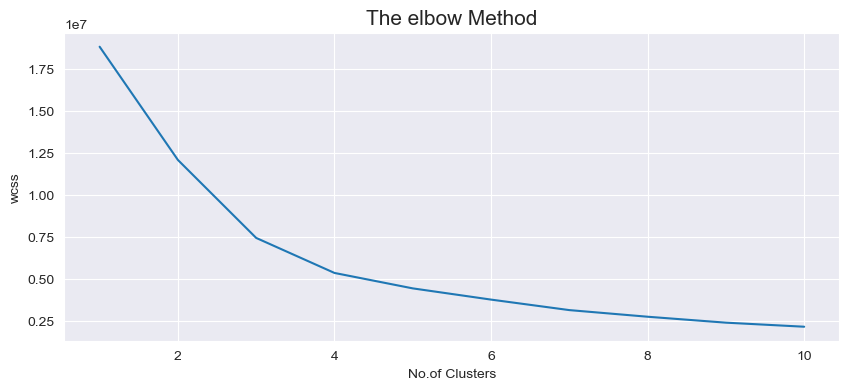

In [16]:
# performing the elbow method to find the optimal k

plt.rcParams["figure.figsize"] = (10, 4)

wcss=[]

for i in range (1,11):
    km = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    km.fit(x_data)
    wcss.append(km.inertia_)

#plot

plt.plot(range(1, 11), wcss)
plt.title("The elbow Method", fontsize = 15)
plt.xlabel("No.of Clusters")
plt.ylabel("wcss")
plt.show()

In [21]:
#implenenting the k-mean algorithm
km = KMeans(n_clusters= 4, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x_data)

#results

a = data["label"]
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns={0: "cluster"})

# Print the results for each cluster
print("Crops in the first cluster: ", z[z["cluster"] == 0]["label"].unique())
print("\n.......................................................\n")
print("Crops in the first cluster: ", z[z["cluster"] == 1]["label"].unique())
print("\n.......................................................\n")
print("Crops in the first cluster: ", z[z["cluster"] == 2]["label"].unique())
print("\n.......................................................\n")
print("Crops in the first cluster: ", z[z["cluster"] == 3]["label"].unique())

Crops in the first cluster:  ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']

.......................................................

Crops in the first cluster:  ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']

.......................................................

Crops in the first cluster:  ['grapes' 'apple']

.......................................................

Crops in the first cluster:  ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


# Split Train Test

In [22]:
#Split dataset

y = data["label"]
x = data.drop(["label"],axis = 1)

print("shape of x", x.shape)
print("shape of y", y.shape)

shape of x (2200, 7)
shape of y (2200,)


In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print("The Shape of x train: ", x_train.shape)
print("The Shape of x test: ", x_test.shape)
print("The Shape of y train: ", y_train.shape)
print("The Shape of y test: ", y_test.shape)


The Shape of x train:  (1760, 7)
The Shape of x test:  (440, 7)
The Shape of y train:  (1760,)
The Shape of y test:  (440,)


In [27]:
#predictive model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Accuracy

In [28]:
#accuracy

from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [29]:
#doing some predictions

prediction = model.predict((np.array([[20,30,10,15,90,7.5,100]])))

print ("The suggested crop for the given conditions is : ",prediction)

The suggested crop for the given conditions is :  ['orange']


In [30]:
prediction = model.predict((np.array([[90,30,50,25,90,6.5,300]])))

print ("The suggested crop for the given conditions is : ",prediction)

The suggested crop for the given conditions is :  ['rice']


In [31]:
prediction = model.predict((np.array([[60,30,33,55,60,3.5,188]])))

print ("The suggested crop for the given conditions is : ",prediction)

The suggested crop for the given conditions is :  ['mango']
